In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
def get_three_classes(x,y):
    idx_0,_ = np.where(y==0.)
    idx_1,_ = np.where(y==1.)
    idx_2,_ = np.where(y==2.)
    
    idxes = np.concatenate([idx_0,idx_1,idx_2],axis = 0)
    
    x= x[idxes]
    y= y[idxes]
    
    count = x.shape[0]
    
    idxes = np.random.choice(range(count),count,replace = False)
    
    x = x[idxes]
    y= y[idxes]
    
    y=tf.keras.utils.to_categorical(y)
    
    return x,y
    

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

[]

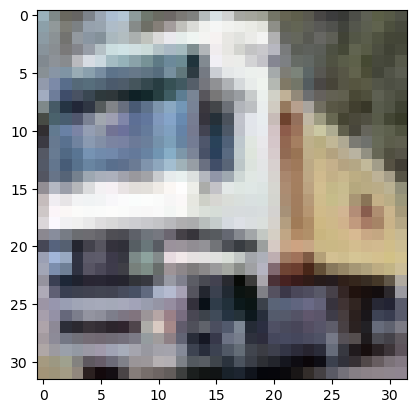

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[1])
plt.plot()

In [5]:
idx_12,_ = np.where(y_train==3.)
idx_12.shape

(5000,)

In [6]:
x_train,y_train = get_three_classes(x_train,y_train)
x_test,y_test = get_three_classes(x_test,y_test)


In [7]:
x_train.shape

(15000, 32, 32, 3)

In [33]:
x_train[0].shape #has 3 channels cause of rgb

(32, 32, 3)

In [32]:
np.unique(x_train[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

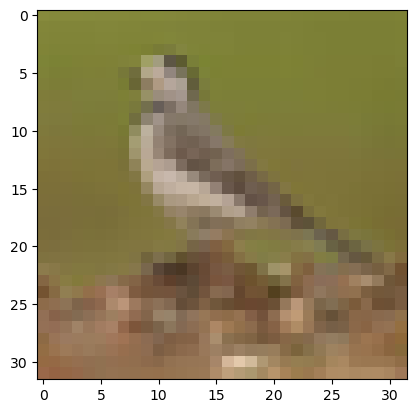

In [25]:
plt.imshow(x_train[41])

In [26]:
x_test.shape

(3000, 32, 32, 3)

In [30]:
y_train.shape

(15000, 3)

In [31]:
y_train[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

## Visualize Examples


In [27]:
class_names = ['plane','car','bird']

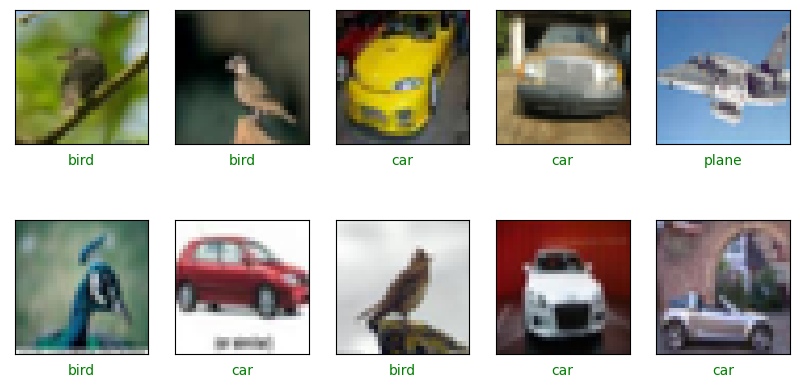

In [36]:
def show_rand_eg(x,y,p):
    indxes = np.random.choice(x.shape[0],10,replace=False)
    
    x=x[indxes]
    y=y[indxes]
    p=p[indxes]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color = col)
    plt.show()
    
show_rand_eg(x_train,y_train,y_train)

## Create a Model 

In [71]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [72]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 64)       

In [73]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,amsgrad=False)

In [74]:
model.compile(
    optimizer=opt,
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 64)       

In [75]:

training= model.fit(x_train/255.,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 30s 149ms/step - loss: 1.1436 - accuracy: 0.5978 - val_loss: 1.0005 - val_accuracy: 0.6147
Epoch 2/10
188/188 [==============================] - 27s 143ms/step - loss: 0.6423 - accuracy: 0.7442 - val_loss: 0.6520 - val_accuracy: 0.7317
Epoch 3/10
188/188 [==============================] - 28s 149ms/step - loss: 0.5542 - accuracy: 0.7816 - val_loss: 0.6455 - val_accuracy: 0.7303
Epoch 4/10
188/188 [==============================] - 26s 138ms/step - loss: 0.5075 - accuracy: 0.7987 - val_loss: 0.5790 - val_accuracy: 0.7743
Epoch 5/10
188/188 [==============================] - 30s 162ms/step - loss: 0.4753 - accuracy: 0.8180 - val_loss: 0.5064 - val_accuracy: 0.7973
Epoch 6/10
188/188 [==============================] - 28s 147ms/step - loss: 0.4418 - accuracy: 0.8279 - val_loss: 0.5384 - val_accuracy: 0.7810
Epoch 7/10
188/188 [==============================] - 27s 144ms/step - loss: 0.4293 - accuracy: 0.8368 - val_loss: 0.5657 - val_ac

In [76]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

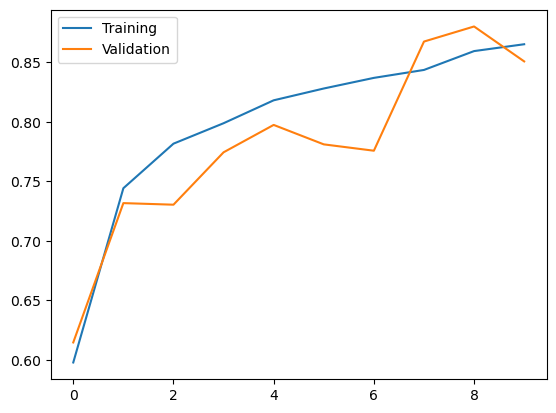

In [77]:
accuracy = training.history['accuracy']
val_acc = training.history['val_accuracy']

plt.plot(range(len(accuracy)),accuracy,label='Training')
plt.plot(range(len(accuracy)),val_acc,label='Validation')
plt.legend()
plt.show()

In [78]:
accuracy = model.evaluate(x_test/255.,y_test)

94/94 [==============================] - 1s 13ms/step - loss: 0.3587 - accuracy: 0.8580
